In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import librosa.display
import IPython.display
import os

plt.rcParams['figure.figsize'] = (14,4)
SAMPLE_RATE = 44100

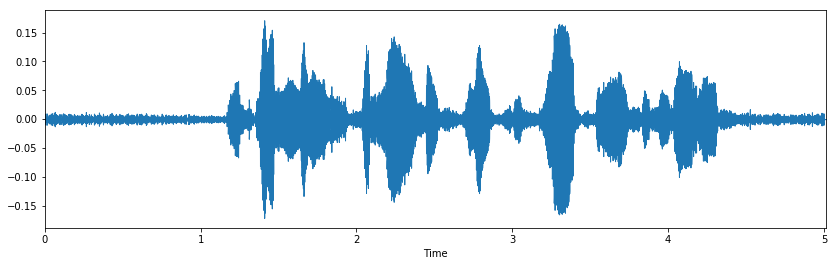

In [147]:
x, fs = librosa.load('data/obama_aud/obama5.wav')
librosa.display.waveplot(x, sr=fs)

In [148]:
ps = librosa.feature.melspectrogram(x, sr=fs)
S_DB = librosa.power_to_db(ps, ref=np.max)
ps.shape

(128, 217)

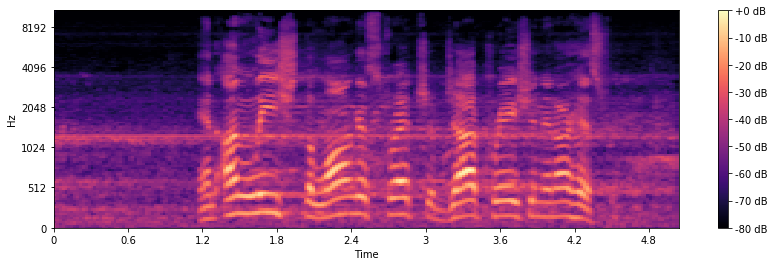

In [149]:
librosa.display.specshow(S_DB, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')

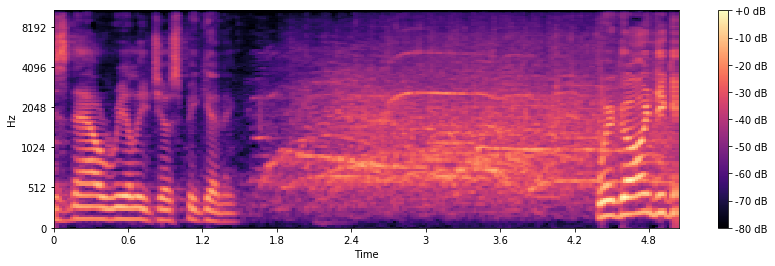

In [150]:
x2, fs = librosa.load('data/trump_aud/trump50.wav')
ps2 = librosa.feature.melspectrogram(x2, sr=fs)
S_DB = librosa.power_to_db(ps2, ref=np.max)
librosa.display.specshow(S_DB, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [151]:
def getSpectogram(name):
    b, fs = librosa.core.load(name)
    ps = librosa.feature.melspectrogram(b, sr=fs)
    S_DB = librosa.power_to_db(ps, ref=np.max)
    return S_DB

In [152]:
X = []
Y = []

for filename in os.listdir('data/obama_aud'):
    df = getSpectogram("data/obama_aud/" + filename)
    X.append(df)
    Y.append(0)
    
for filename in os.listdir('data/trump_aud'):
    df = getSpectogram("data/trump_aud/" + filename)
    X.append(df)
    Y.append(1)

In [153]:
X = np.asarray(X)

In [154]:
X.shape

(212, 128, 217)

In [155]:
Y = np.asarray(Y)

In [156]:
Y.shape

(212,)

In [157]:
X = X.reshape(212,128,217,1)

In [158]:
X.shape

(212, 128, 217, 1)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10, shuffle = True)

In [160]:
X_train.shape

(169, 128, 217, 1)

In [161]:
X_train /= 80

In [162]:
X_test /=80

In [173]:
y_train

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [163]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D,Flatten, MaxPooling2D
from keras.models import Sequential

In [169]:
model = Sequential()
input_shape=(128, 217, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 124, 213, 24)      624       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 106, 24)       0         
_________________________________________________________________
activation_47 (Activation)   (None, 31, 106, 24)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 27, 102, 48)       28848     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 51, 48)         0         
_________________________________________________________________
activation_48 (Activation)   (None, 6, 51, 48)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 2, 47, 48)         57648     
__________

In [174]:
model.compile(
	optimizer="Adam",
	loss="binary_crossentropy",
	metrics=['accuracy'])

history = model.fit(
	x=X_train, 
	y=y_train,
    epochs=25,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 169 samples, validate on 43 samples
Epoch 1/25
169/169 [==============================] - 10s 58ms/step - loss: 0.4051 - acc: 0.7929 - val_loss: 0.2390 - val_acc: 0.9535
Epoch 2/25
169/169 [==============================] - 7s 42ms/step - loss: 0.2864 - acc: 0.9290 - val_loss: 0.3795 - val_acc: 0.8372
Epoch 3/25
169/169 [==============================] - 6s 35ms/step - loss: 0.2952 - acc: 0.8639 - val_loss: 0.2027 - val_acc: 0.9070
Epoch 4/25
169/169 [==============================] - 6s 37ms/step - loss: 0.1843 - acc: 0.9527 - val_loss: 0.1517 - val_acc: 0.9767
Epoch 5/25
169/169 [==============================] - 6s 34ms/step - loss: 0.2126 - acc: 0.9408 - val_loss: 0.1530 - val_acc: 0.9302
Epoch 6/25
169/169 [==============================] - 6s 36ms/step - loss: 0.1739 - acc: 0.9586 - val_loss: 0.1783 - val_acc: 0.9302
Epoch 7/25
169/169 [==============================] - 6s 33ms/step - loss: 0.1339 - acc: 0.9527 - val_loss: 0.1245 - val_acc: 0.9302
Epoch 8/25
169/169 [===

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


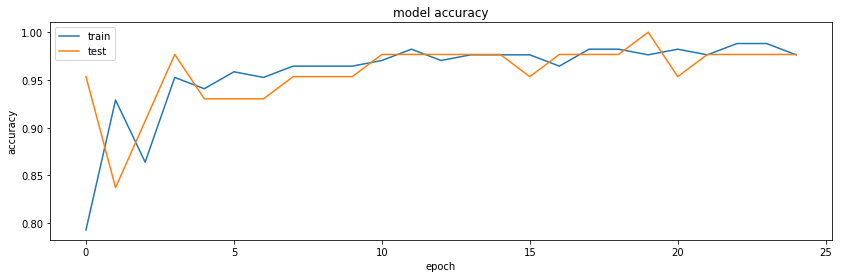

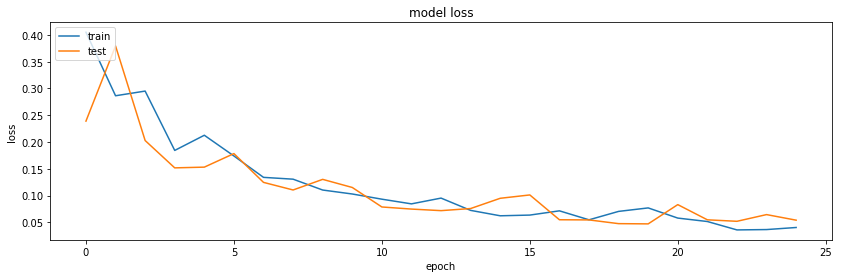

In [175]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [190]:
def predict(name):
    b, fs = librosa.core.load(name)
    ps = librosa.feature.melspectrogram(b, sr=fs)
    S_DB = librosa.power_to_db(ps, ref=np.max)
    test = S_DB.reshape(1,128,217,1)
    return model.predict(test)

In [191]:
predict('data/obama_aud/obama5.wav')

array([[0.]], dtype=float32)

In [192]:
predict('data/trump_aud/trump5.wav')

array([[1.]], dtype=float32)